<a href="https://colab.research.google.com/github/Hokage6502/ElecViz/blob/main/loksabha_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.8 MB/s eta 0:00:00


In [7]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
from shapely.geometry import MultiPolygon, Polygon
import seaborn as sns
sns.set()

In [10]:
candidate_2019=pd.read_csv('lok_sabha_candidates_data.csv')
candidate_2019.head(10)

,State,Constituency,Name,Winner,Party,Symbol,Gender,Criminal Cases,Age,Category,Education,Assets,Liabilities,General Votes,Postal Votes,Total Votes,Over Total Electors In Constituency,Over Total Votes Polled In Constituency,Total Electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414 ~ 30 Lacs+","Rs 2,31,450 ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888 ~ 1 Crore+","Rs 8,47,000 ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000 ~ 3 Crore+","Rs 1,53,00,000 ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036 ~ 7 Crore+","Rs 86,06,522 ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385 ~ 13 Crore+","Rs 2,22,51,891 ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate,"Rs 5,50,75,753 ~ 5 Crore+",Rs 0 ~,44877,272,45149,2.330042,3.940979,1937690
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,Lotus,MALE,0,37.0,GENERAL,Doctorate,"Rs 16,86,64,576 ~ 16 Crore+","Rs 26,23,964 ~ 26 Lacs+",696961,7699,704660,37.856533,58.425159,1861396
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,Clock,MALE,1,34.0,GENERAL,Graduate,"Rs 9,44,88,381 ~ 9 Crore+","Rs 3,25,49,132 ~ 3 Crore+",419364,3822,423186,22.734872,35.087431,1861396
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,Cup & Saucer,MALE,0,62.0,GENERAL,Graduate,"Rs 1,39,49,000 ~ 1 Crore+","Rs 14,00,000 ~ 14 Lacs+",31644,163,31807,1.708771,2.637200,1861396


In [11]:
candidate_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   State                                    2263 non-null   object 
 1   Constituency                             2263 non-null   object 
 2   Name                                     2263 non-null   object 
 3   Winner                                   2263 non-null   int64  
 4   Party                                    2263 non-null   object 
 5   Symbol                                   2018 non-null   object 
 6   Gender                                   2018 non-null   object 
 7   Criminal Cases                           2018 non-null   object 
 8   Age                                      2018 non-null   float64
 9   Category                                 2018 non-null   object 
 10  Education                                2018 no

In [12]:
candidate_2019.describe()

,Winner,Age,General Votes,Postal Votes,Total Votes,Over Total Electors In Constituency,Over Total Votes Polled In Constituency,Total Electors
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [13]:
candidate_2019["Name"].value_counts()

NOTA                  245
ATUL KUMAR SINGH        2
Rahul Gandhi            2
SANJAY KUMAR            2
Ajay Kumar              2
                     ... 
QUEEN OJA               1
Manish Khanduri         1
Tirath Singh Rawat      1
RAVTARAM                1
BANALA LAXMA REDDY      1
Name: Name, Length: 2014, dtype: int64

In [14]:
# remove Candidate name NOTA
candidate_2019 = candidate_2019[candidate_2019["Name"]!="NOTA"]
candidate_2019["Name"] = [x.title() for x in candidate_2019["Name"]]

<ipython-input-14-ed0ee8b8cc6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_2019["Name"] = [x.title() for x in candidate_2019["Name"]]


In [15]:
candidate_2019["Name"].value_counts()

Atul Kumar Singh      2
Rahul Gandhi          2
Sushil Kumar Singh    2
Ajay Kumar            2
Vijay Kumar           2
                     ..
Manish Khanduri       1
Tirath Singh Rawat    1
Ravtaram              1
Bharat Ram Meghwal    1
Banala Laxma Reddy    1
Name: Name, Length: 2009, dtype: int64

In [16]:
candidate_2019["Constituency"].value_counts()

AURANGABAD     13
GAYA (SC)      11
MAHARAJGANJ     8
CHATRA          8
SUPAUL          8
               ..
BHOPAL          2
JAMMU           2
JAMNAGAR        2
KANNAUJ         2
NAVSARI         2
Name: Constituency, Length: 539, dtype: int64

In [17]:

# remove category annotation with Constituency name
candidate_2019["Constituency"] = [x[0].strip() for x in candidate_2019["Constituency"].str.split('(')]

In [18]:
candidate_2019["Constituency"].value_counts()

AURANGABAD     13
GAYA           11
MAHARAJGANJ     8
CHATRA          8
SUPAUL          8
               ..
BHOPAL          2
JAMMU           2
JAMNAGAR        2
KANNAUJ         2
NAVSARI         2
Name: Constituency, Length: 539, dtype: int64

In [19]:
# Cleanup Assets and Liabiities columns
candidate_2019["Assets"].fillna("0",inplace=True)
candidate_2019["Assets"].replace(["Nil","NIL","Not Available","`"],"0",inplace=True)
candidate_2019["Assets"] = [float(x.split("~")[0].split("Rs")[-1].replace(",","")) for x in candidate_2019["Assets"]]

candidate_2019["Liabilities"].fillna("0",inplace=True)
candidate_2019["Liabilities"].replace(["Nil","NIL","Not Available","`"],"0",inplace=True)
candidate_2019["Liabilities"] = [float(x.split("~")[0].split("Rs")[-1].replace(",","")) for x in candidate_2019["Liabilities"]]


In [20]:
#criminal cases cleaning
candidate_2019["Criminal Cases"].replace("Not Available",0,inplace=True)
candidate_2019["Criminal Cases"] = candidate_2019["Criminal Cases"].astype(np.int32)

In [21]:
#education_level cleaning
candidate_2019["Education"].replace(['5th Pass','Illiterate','Others','Not Available'],'Iliterate/NA',inplace=True)
# candidate_2019["Education"].replace(['8th Pass','10th Pass','12th Pass'],'School Level',inplace=True)
candidate_2019["Education"].replace(['Graduate Professional','Graduate'],'Graduate',inplace=True)
candidate_2019["Education"].replace(['Post Graduate\n','Post Graduate', 'Doctorate'],'Post Graduate/Doctorate',inplace=True)

In [30]:
state_map = gpd.read_file("/content/Indian_States.shp")
state_map.head()


,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [31]:
# There are some naming and geographical issues that need 
# to be addressed to align state names in map data to Lok Sabha candidates data
set(candidate_2019.groupby("State").groups.keys()).symmetric_difference(set(state_map.groupby("st_nm").groups.keys()))

{'Andaman & Nicobar Island',
 'Andaman & Nicobar Islands',
 'Arunachal Pradesh',
 'Arunanchal Pradesh',
 'Dadara & Nagar Havelli',
 'Dadra & Nagar Haveli',
 'NCT OF Delhi',
 'NCT of Delhi'}

In [32]:
# renaming changes
state_map["st_nm"][state_map["st_nm"]=='Andaman & Nicobar Island'] = 'Andaman & Nicobar Islands'
state_map["st_nm"][state_map["st_nm"]=='NCT of Delhi'] = 'NCT OF Delhi'
state_map["st_nm"][state_map["st_nm"]=='Arunanchal Pradesh'] = 'Arunachal Pradesh'
state_map["st_nm"][state_map["st_nm"]=='Dadara & Nagar Havelli'] = 'Dadra & Nagar Haveli'

state_map = state_map[~state_map.st_nm.isin(["Dadra and Nagar Haveli and Daman and Diu","Ladakh"])]

state_map.set_index("st_nm",inplace=True)
state_map.head()

<ipython-input-32-42f02c7b7587>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-42f02c7b7587>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-42f02c7b7587>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-42f02c7b7587>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

,geometry
st_nm,
Andaman & Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [33]:
pc_map=gpd.read_file("india_pc_2019.shp")
pc_map.head(10)

ERROR:fiona._env:map\parliamentary-constituencies\india_pc_2019.shp: No such file or directory


DriverError: ignored

In [ ]:
set(candidate_2019.groupby("Constituency").groups.keys()).symmetric_difference(set(pc_map.groupby("PC_NAME").groups.keys()))

In [ ]:
# remove category annotation with PC_NAME name
pc_map["PC_NAME"] = [x[0].strip() for x in pc_map["PC_NAME"].str.split('(')]
pc_map.reset_index(level=0, inplace=True)
# pc_map.set_index("PC_NAME",inplace=True)

In [ ]:
set(candidate_2019.groupby("Constituency").groups.keys()).symmetric_difference(set(pc_map.groupby("PC_NAME").groups.keys()))

In [ ]:
pc_map.head()
# pc_map.reset_index(level=0, inplace=True)

In [ ]:
# renaming changes
pc_map["PC_NAME"][pc_map["PC_NAME"]=='AHMEDNAGAR'] = 'AHMADNAGAR'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='ANAKAPALLE'] = 'ANAKAPALLI'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='ANDAMAN & NICOBAR'] = 'ANDAMAN & NICOBAR ISLANDS'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='ARAKU'] = 'ARUKU'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='ARAMBAG'] = 'ARAMBAGH'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='BARDHAMAN-DURGAPUR'] = 'BARDHAMAN DURGAPUR'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='BARRACKPUR'] = 'BARRACKPORE'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='BHANDARA-GONDIYA'] = 'BHANDARA - GONDIYA'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='COOCHBEHAR'] = 'COOCH BEHAR'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='DADRA & NAGAR HAVELI'] = 'DADRA AND NAGAR HAVELI'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='KARAULI -DHOLPUR'] = 'KARAULI-DHOLPUR'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='MUMBAI NORTH-CENTRAL'] = 'MUMBAI NORTH CENTRAL'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='MUMBAI NORTH-EAST'] = 'MUMBAI NORTH EAST'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='MUMBAI NORTH-WEST'] = 'MUMBAI NORTH WEST'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='MUMBAI SOUTH -CENTRAL'] = 'MUMBAI SOUTH CENTRAL'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='PALAMU'] = 'PALAMAU'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='PONDICHERRY'] = 'PUDUCHERRY'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='RATNAGIRI -SINDHUDURG'] = 'RATNAGIRI - SINDHUDURG'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='SURGUJA'] = 'SARGUJA'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='SECUNDERABAD'] = 'SECUNDRABAD'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='SREERAMPUR'] = 'SRERAMPUR'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='TIRUVALLUR'] = 'THIRUVALLUR'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='TONK - SAWAI MADHOPUR'] = 'TONK-SAWAI MADHOPUR'
pc_map["PC_NAME"][pc_map["PC_NAME"]=='PALAMU'] = 'PALAMAU'

# pc_map = pc_map[~pc_map.PC_NAME.isin(["Dadra and Nagar Haveli and Daman and Diu","Ladakh"])]

# pc_map.reset_index(0,inplace=True)

In [ ]:
# set(candidate_2019.groupby("Constituency").groups.keys()).symmetric_difference(set(pc_map.groupby("PC_NAME").groups.keys()))

In [35]:
state_df = candidate_2019[['State','Constituency','Total Electors']]

fig = px.sunburst(state_df, 
                        path=['State','Constituency'], 
                        values='Total Electors',
                        color='Total Electors',
                        color_continuous_scale='Oryel')
fig.update_layout(title_text='State and Constituency by Total Electors')
fig.show()

In [36]:

state_wise_dist = pd.merge(state_map, pd.DataFrame(candidate_2019[candidate_2019["Winner"]==1].groupby("State")["Winner"].size()), left_index=True, right_index=True)
state_wise_dist

,geometry,Winner
Andaman & Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",1
Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",2
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",14
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",41
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",1
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",11
Dadra & Nagar Haveli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",1
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",1
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",2
Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",26


In [37]:
state_wise_dist.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 36 entries, Andaman & Nicobar Islands to Andhra Pradesh
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  36 non-null     geometry
 1   Winner    36 non-null     int64   
dtypes: geometry(1), int64(1)
memory usage: 1.9+ KB


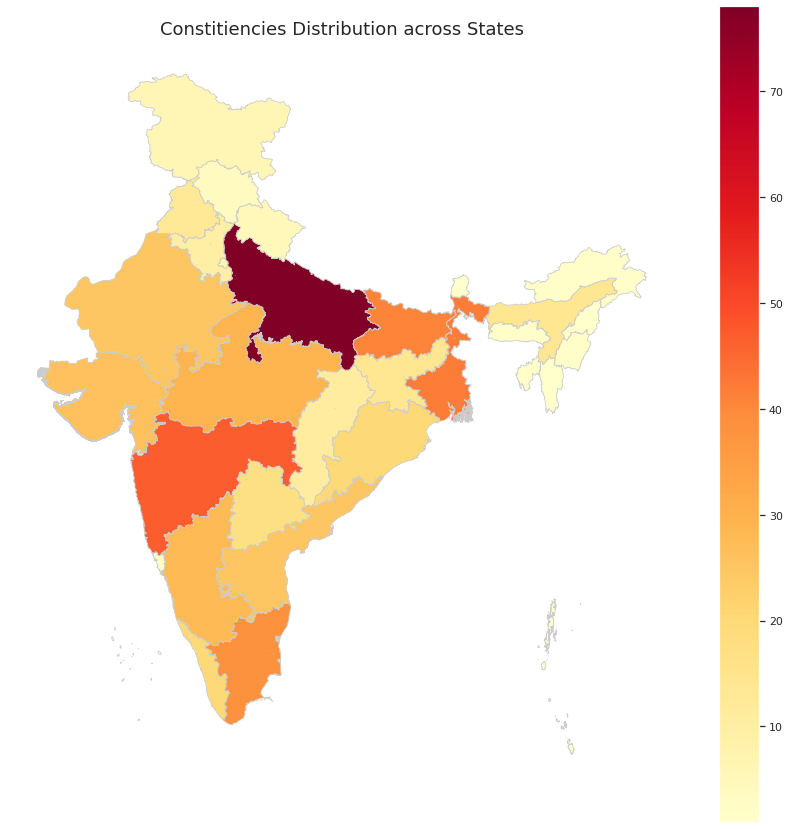

In [38]:

fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Constitiencies Distribution across States', fontsize=18)
state_wise_dist.plot(column='Winner', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)
# plt.savefig("pic/assets/median_assets_states.jpg",bbox_inches = "tight")

In [39]:

pc_map.rename(columns = {'PC_NAME':'Constituency'}, inplace = True)
pc_result= pd.merge(pc_map, pd.DataFrame(candidate_2019[candidate_2019["Winner"]==1]), on="Constituency")
pc_result

NameError: ignored

In [40]:
def set_color(data):
    if data['Party']=="BJP":
        return 'orange'
    elif data['Party']=="INC":
        return 'Cyan'
    else:
        return 'Grey'
pc_result["color"]=pc_result.apply(set_color,axis=1)

NameError: ignored

NameError: ignored

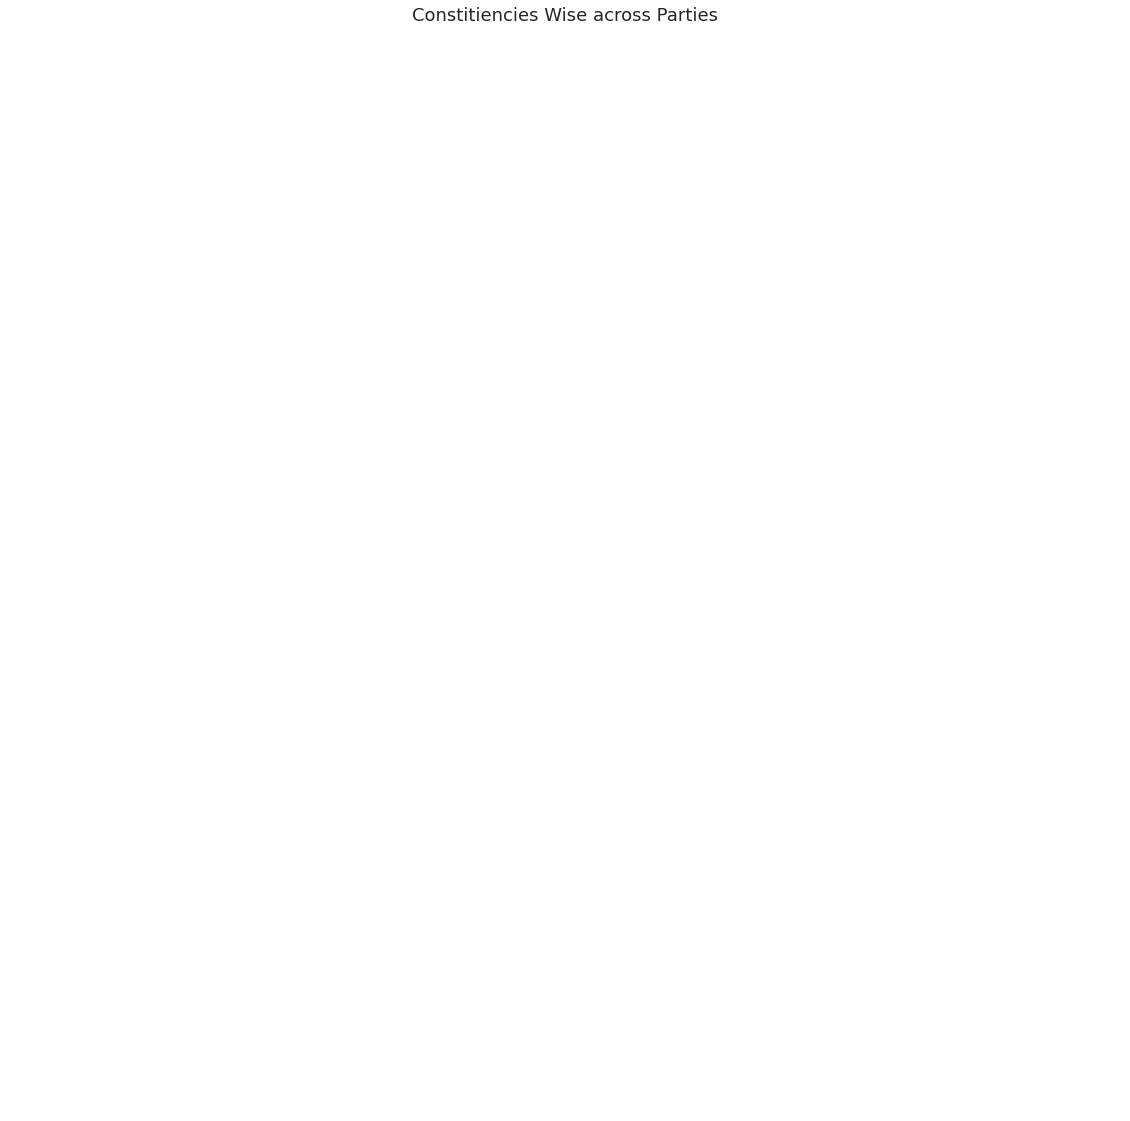

In [41]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.axis('off')
ax.set_title('Constitiencies Wise across Parties', fontsize=18)
pc_result.plot(column='Party',  linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.axis('off')
ax.set_title('Constitiencies Wise across Parties', fontsize=18)
pc_result.plot(column='Party',color=pc_result["color"],  linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

In [122]:
fig = px.scatter(state_df, 
                 x='State', 
                 y='Total Electors', 
                 size='Total Electors',
                 color='State',
                 hover_name='Constituency',
                 height=1000)

fig.update_layout(title_text='State and Constituencies-wise Electorals records',
                         xaxis_title="State",
                         yaxis_title="Total Electorals")

fig.show()

In [43]:
# Number of seats won by each party
result = candidate_2019[candidate_2019['Winner'] == 1].groupby('Party')['Winner'].size()
total = candidate_2019.groupby('Party')['Winner'].size()
result_df = pd.DataFrame(data=result)
result_df["Total Party Candidate"]=total
result_df=result_df.sort_values(by="Winner", ascending=False)[:20]
result_df.reset_index(level=0, inplace=True)
result_df.head(10)

,Party,Winner,Total Party Candidate
0,BJP,300,420
1,INC,52,413
2,DMK,23,23
3,AITC,22,47
4,YSRCP,22,25
5,SHS,18,26
6,JD(U),16,18
7,BJD,11,21
8,BSP,11,163
9,TRS,9,17


In [44]:
d2 = result_df.melt(id_vars="Party", var_name="seats")
d2.head(10)

,Party,seats,value
0,BJP,Winner,300
1,INC,Winner,52
2,DMK,Winner,23
3,AITC,Winner,22
4,YSRCP,Winner,22
5,SHS,Winner,18
6,JD(U),Winner,16
7,BJD,Winner,11
8,BSP,Winner,11
9,TRS,Winner,9


In [45]:
# Visualize the party-wise election results
result_fig = px.bar(d2, 
                    x=d2['Party'], 
                    y=d2["value"], 
                    color=d2['seats'],
                    barmode="group", 
                    height=500,
                    color_continuous_scale='Oryel')
result_fig.update_layout(title_text='Top 20 Party-wise election results',
                         xaxis_title="Party",
                         yaxis_title="Seats")
result_fig.show()

In [46]:
major_parties = list(candidate_2019["Party"].value_counts().sort_values().index[-15:])
major_parties

['DMK',
 'YSRCP',
 'AAP',
 'TDP',
 'SHS',
 'MNM',
 'NTK',
 'SP',
 'VBA',
 'AITC',
 'CPI(M)',
 'BSP',
 'IND',
 'INC',
 'BJP']

In [47]:
vote_Share = candidate_2019.groupby('Party')['Total Votes'].sum()
vote_Share_df = pd.DataFrame(data=vote_Share, index=vote_Share.index).sort_values(by="Total Votes", ascending=False)
vote_Share_df.reset_index(level=0, inplace=True)
def sort_party(data):
    if data['Party'] not in major_parties:
        return 'Other'
    else:
        return data['Party']

# Calling the method
vote_Share_df['Party New'] = vote_Share_df.apply(sort_party, axis=1)
vote_count = vote_Share_df.groupby('Party New')['Total Votes'].sum()
vote_Share_df=pd.DataFrame(data=vote_count, index=vote_count.index).sort_values(by="Total Votes", ascending=False)
vote_Share_df.reset_index(level=0, inplace=True)
vote_Share_df.head()

,Party New,Total Votes
0,BJP,228938556
1,INC,119418722
2,Other,93518573
3,AITC,24832104
4,BSP,20808194


In [48]:
fig = px.pie(vote_Share_df, values='Total Votes', names='Party New',
             title='Vote Share of Major Parties',
             hover_name="Party New",
             hover_data=["Total Votes"], labels={'Party New':'Total Votes'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [49]:
seat_Share = candidate_2019[candidate_2019['Winner']==1].groupby('Party').sum()
seat_Share_df = pd.DataFrame(data=seat_Share, index=seat_Share.index)
seat_Share_df.reset_index(level=0, inplace=True)
def sort_party(data):
    if data['Party'] not in major_parties:
        return 'Other'
    else:
        return data['Party']

# Calling the method
seat_Share_df['Party New'] = seat_Share_df.apply(sort_party, axis=1)
seat_count = seat_Share_df.groupby('Party New')['Winner'].sum()
seat_Share_df=pd.DataFrame(data=seat_count, index=seat_count.index).sort_values(by="Winner", ascending=False)
seat_Share_df.reset_index(level=0, inplace=True)
seat_Share_df.head()

,Party New,Winner
0,BJP,300
1,Other,73
2,INC,52
3,DMK,23
4,AITC,22


In [50]:
fig = px.pie(seat_Share_df, values='Winner', names='Party New',
             title='Seat Share of Major Parties',
             hover_name="Party New",
             hover_data=["Winner"], labels={'Party New':'Winner'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [51]:
# Taking out all the candiates that has cand_vote_margin
cand_vote_margin = candidate_2019[candidate_2019['Winner']==1].reset_index().drop('index',axis=1)
# Taking column name is list
constituency_name = pd.unique(cand_vote_margin['Constituency'])
# Creating new column as assigning with 'NaN'
cand_vote_margin['Vote_margin'] = np.nan
cand_vote_margin.head()

,State,Constituency,Name,Winner,Party,Symbol,Gender,Criminal Cases,Age,Category,Education,Assets,Liabilities,General Votes,Postal Votes,Total Votes,Over Total Electors In Constituency,Over Total Votes Polled In Constituency,Total Electors,Vote_margin
0,Telangana,ADILABAD,Soyam Bapu Rao,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790,NaN
1,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Post Graduate/Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690,NaN
2,Maharashtra,AHMADNAGAR,Dr. Sujay Radhakrishna Vikhepatil,1,BJP,Lotus,MALE,0,37.0,GENERAL,Post Graduate/Doctorate,168664576.0,2623964.0,696961,7699,704660,37.856533,58.425159,1861396,NaN
3,Gujarat,AHMEDABAD EAST,Patel Hasmukhbhai Somabhai,1,BJP,Lotus,MALE,0,58.0,GENERAL,Iliterate/NA,74699690.0,6252577.0,745810,4024,749834,41.384970,67.005462,1811851,NaN
4,Gujarat,AHMEDABAD WEST,Dr. Kirit P. Solanki,1,BJP,Lotus,MALE,0,69.0,SC,Post Graduate/Doctorate,89474039.0,0.0,638241,3381,641622,39.044323,64.211450,1643317,NaN


In [52]:
# For loop to calculate vote margin and filling it to its respective place
for i in constituency_name:
    row = candidate_2019[candidate_2019['Constituency']== i ].sort_values('Total Votes', ascending=False)
    first = row.iloc[0][15]
    second = row.iloc[1][15]
    difference = first - second
    cand_vote_margin[cand_vote_margin['Constituency']== i] = cand_vote_margin[cand_vote_margin['Constituency']== i].fillna(difference)
    
# Since the column 'Vote_margin' is in float, changing it to int
cand_vote_margin['Vote_margin']=cand_vote_margin['Vote_margin'].astype(int)
cand_vote_margin.head()

,State,Constituency,Name,Winner,Party,Symbol,Gender,Criminal Cases,Age,Category,Education,Assets,Liabilities,General Votes,Postal Votes,Total Votes,Over Total Electors In Constituency,Over Total Votes Polled In Constituency,Total Electors,Vote_margin
0,Telangana,ADILABAD,Soyam Bapu Rao,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790,58560
1,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Post Graduate/Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690,211546
2,Maharashtra,AHMADNAGAR,Dr. Sujay Radhakrishna Vikhepatil,1,BJP,Lotus,MALE,0,37.0,GENERAL,Post Graduate/Doctorate,168664576.0,2623964.0,696961,7699,704660,37.856533,58.425159,1861396,281474
3,Gujarat,AHMEDABAD EAST,Patel Hasmukhbhai Somabhai,1,BJP,Lotus,MALE,0,58.0,GENERAL,Iliterate/NA,74699690.0,6252577.0,745810,4024,749834,41.384970,67.005462,1811851,434330
4,Gujarat,AHMEDABAD WEST,Dr. Kirit P. Solanki,1,BJP,Lotus,MALE,0,69.0,SC,Post Graduate/Doctorate,89474039.0,0.0,638241,3381,641622,39.044323,64.211450,1643317,321546


In [53]:
buttom_10_margin = cand_vote_margin.sort_values('Vote_margin',ascending=False).tail(10)
fig= px.bar(buttom_10_margin,y=buttom_10_margin["Name"],x=buttom_10_margin["Vote_margin"], color="Party"
            ,title="Candidates with Lowest Vote Margin")
fig.update_layout(yaxis_categoryorder = 'total descending')
fig.show()

In [54]:
top_10_margin = cand_vote_margin.sort_values('Vote_margin',ascending=False).head(10)
fig= px.bar(top_10_margin,y=top_10_margin["Name"],x=top_10_margin["Vote_margin"], color="Party"
            ,title="Candidates with Greatest Vote Margin")
fig.update_layout(yaxis_categoryorder = 'total descending')
fig.show()

In [55]:
fig= px.box(cand_vote_margin,x=cand_vote_margin["Party"],y=cand_vote_margin["Vote_margin"], 
            color="Party",title="Vote Margin Distribution across Parties")
fig.show()

In [56]:
poorest_10 = candidate_2019[candidate_2019['Assets']>0].sort_values('Assets',ascending=False).tail(10)
fig= px.bar(poorest_10,y=poorest_10["Name"],x=poorest_10["Assets"], color="Party"
            ,title="Poorest Candidates across Parties")
fig.update_layout(yaxis_categoryorder = 'total descending')
fig.show()

In [57]:
richest_10 = candidate_2019[candidate_2019['Assets']>0].sort_values('Assets',ascending=False).head(10)
fig= px.bar(richest_10,y=richest_10["Name"],x=richest_10["Assets"], color="Party"
            ,title="Richest Candidates across Parties")
fig.update_layout(yaxis_categoryorder = 'total descending')
fig.show()

In [58]:
asset_df=candidate_2019[candidate_2019["Party"].isin(major_parties)]
asset_df.head()


,State,Constituency,Name,Winner,Party,Symbol,Gender,Criminal Cases,Age,Category,Education,Assets,Liabilities,General Votes,Postal Votes,Total Votes,Over Total Electors In Constituency,Over Total Votes Polled In Constituency,Total Electors
0,Telangana,ADILABAD,Soyam Bapu Rao,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790
2,Telangana,ADILABAD,Rathod Ramesh,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Post Graduate/Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate/Doctorate,133784385.0,22251891.0,434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate/Doctorate,55075753.0,0.0,44877,272,45149,2.330042,3.940979,1937690


In [59]:
fig= px.box(asset_df,x=asset_df["Party"],y=asset_df["Assets"], color=asset_df["Party"]
            ,title="Assets Variation across Parties")
fig.show()

In [60]:
fig= px.box(asset_df,x=asset_df["Party"],y=asset_df["Assets"], color=asset_df["Party"]
            ,title="Assets Logarithmic Variation across Parties",log_y=True)
fig.show()

In [61]:
fig= px.box(candidate_2019,x=candidate_2019["State"],y=candidate_2019["Assets"], 
            color=candidate_2019["State"],title="Assets Variation across States")
fig.show()

In [62]:
fig= px.box(candidate_2019,x=candidate_2019["State"],y=candidate_2019["Assets"], 
            color=candidate_2019["State"],title="Assets Logarithmic Variation across States",log_y=True)
fig.show()

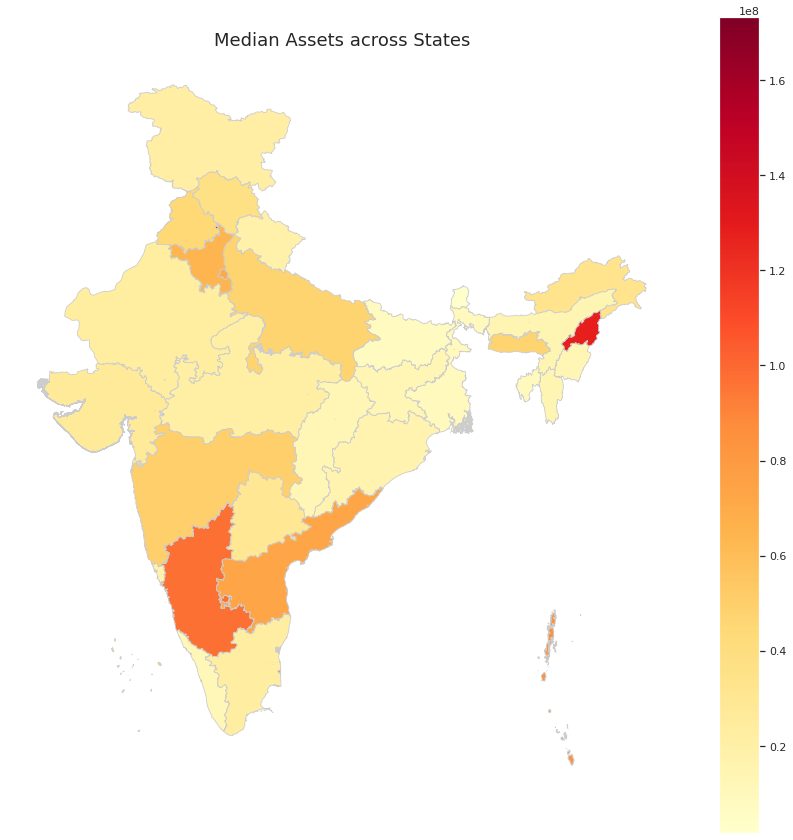

In [63]:
candidate_2019['Assets'].astype(int)
state_wise_assets = pd.merge(state_map, pd.DataFrame(candidate_2019.groupby("State")["Assets"].median()), left_index=True, right_index=True)

fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Median Assets across States', fontsize=18)
state_wise_assets.plot(column='Assets', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

In [64]:
candidate_2019['Assets'].astype(int)
Constituency_wise_assets = pd.merge(pc_map, pd.DataFrame(candidate_2019.groupby("Constituency")["Assets"].median()), on="Constituency")

fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Median Assets across Constituencys', fontsize=18)
Constituency_wise_assets.plot(column='Assets', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

NameError: ignored

In [65]:
fig = px.scatter(candidate_2019, x='Assets', y='Liabilities', 
                 color='State',size='Assets', 
                 height=600,
                 hover_data=(['Name','Party','Constituency','State','Winner']),
                 title='Assets vs Liabilities for All Politicians')
fig.show()

In [66]:
fig = px.scatter(candidate_2019, x='Assets', y='Liabilities', 
                 color='State',size='Assets', 
                 height=600,
                 hover_data=(['Name','Party','Constituency','State','Winner']),
                 title='Assets vs Liabilities for All Politicians')
fig.show()

In [67]:
candidate_2019["assets_rank"] = candidate_2019.groupby(["Constituency"])["Assets"].rank("dense",ascending=False)
rank_asset_df=pd.DataFrame(candidate_2019.groupby("assets_rank")["Winner"].mean())
rank_asset_df.reset_index(0,inplace=True)
rank_asset_df.head()

,assets_rank,Winner
0,1.0,0.415584
1,2.0,0.369686
2,3.0,0.181237
3,4.0,0.078947
4,5.0,0.040984


In [68]:
fig = px.bar(rank_asset_df, y='Winner', x="assets_rank",
             labels={"assets_rank": "Rank in terms of asset (lower rank = more assets)",
                     "Winner": "Unnormalized winning chances"},
             title="Chances of winning against assets")
fig.show()

In [69]:
shady_candidate = candidate_2019.sort_values('Criminal Cases',ascending=False).head(10)
fig= px.bar(shady_candidate,y=shady_candidate["Name"],x=shady_candidate["Criminal Cases"], 
            color="Party",title="Highest number of Criminal Cases")
fig.update_layout(yaxis_categoryorder = 'total descending')
fig.show()

In [70]:
cases_df=candidate_2019[candidate_2019["Party"].isin(major_parties)]
cases_df.head()

,State,Constituency,Name,Winner,Party,Symbol,Gender,Criminal Cases,Age,Category,Education,Assets,Liabilities,General Votes,Postal Votes,Total Votes,Over Total Electors In Constituency,Over Total Votes Polled In Constituency,Total Electors,assets_rank
0,Telangana,ADILABAD,Soyam Bapu Rao,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790,3.0
2,Telangana,ADILABAD,Rathod Ramesh,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790,1.0
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Post Graduate/Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690,2.0
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate/Doctorate,133784385.0,22251891.0,434199,1130,435329,22.466390,37.999125,1937690,1.0
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate/Doctorate,55075753.0,0.0,44877,272,45149,2.330042,3.940979,1937690,3.0


In [71]:
fig= px.box(cases_df,x=cases_df["Party"],y=cases_df["Criminal Cases"], color=cases_df["Party"]
            ,title="Criminal Cases Variation across Parties")
fig.show()

In [72]:
fig= px.box(cases_df,x=cases_df["Party"],y=cases_df["Criminal Cases"], color=cases_df["Party"]
            ,title="Criminal Cases Logarithmic Variation across Parties",log_y=True)
fig.show()

In [73]:
fig= px.box(candidate_2019,x=candidate_2019["State"],y=candidate_2019["Criminal Cases"], 
            color=candidate_2019["State"],title="Criminal Cases Variation across States")
fig.show()

In [74]:
fig= px.box(candidate_2019,x=candidate_2019["State"],y=candidate_2019["Criminal Cases"], 
            color=candidate_2019["State"],title="Criminal Cases Logarithmic Variation across States",log_y=True)
fig.show()

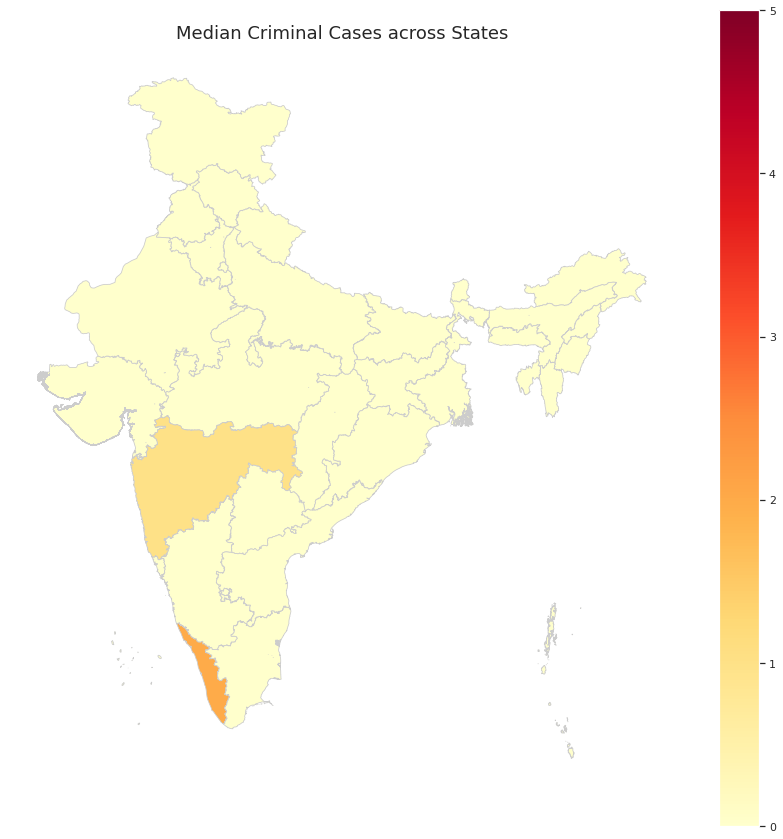

In [75]:
candidate_2019['Criminal Cases'].astype(int)
state_wise_cases = pd.merge(state_map, pd.DataFrame(candidate_2019.groupby("State")["Criminal Cases"].median()), left_index=True, right_index=True)

fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Median Criminal Cases across States', fontsize=18)
state_wise_cases.plot(column='Criminal Cases', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

In [76]:
candidate_2019['Criminal Cases'].astype(int)
Constituency_wise_cases = pd.merge(pc_map, pd.DataFrame(candidate_2019.groupby("Constituency")["Criminal Cases"].median()), on="Constituency")

fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Median Criminal Cases across Constituencys', fontsize=18)
Constituency_wise_cases.plot(column='Criminal Cases', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

NameError: ignored

In [77]:
fig = px.scatter(candidate_2019, x='Assets', y='Criminal Cases', 
                 color='State',size='Assets', 
                 hover_data=(['Name','Criminal Cases','Party','Constituency','State','Winner']),
                 title='Assets vs Criminal Cases for All Politicians')
fig.show()

In [78]:
candidate_2019["cases_rank"] = candidate_2019.groupby(["Constituency"])["Criminal Cases"].rank("dense",ascending=False)
rank_case_df=pd.DataFrame(candidate_2019.groupby("cases_rank")["Winner"].mean())
rank_case_df.reset_index(0,inplace=True)
rank_case_df.head()

,cases_rank,Winner
0,1.0,0.311086
1,2.0,0.262613
2,3.0,0.200680
3,4.0,0.041667
4,5.0,0.000000


In [79]:
fig = px.bar(rank_case_df, y='Winner', x="cases_rank",
             labels={"cases_rank": "Rank in terms of cases (lower rank = more cases)",
                     "Winner": "Unnormalized winning chances"},
             title="Chances of winning against cases")
fig.show()

In [80]:
total = candidate_2019.groupby('Education')['Winner'].size()
edu_df=pd.DataFrame(candidate_2019[candidate_2019["Winner"]==1].groupby("Education")["Winner"].size())
edu_df["Total Candidate"]=total
edu_df.reset_index(0,inplace=True)
edu_df.head()

,Education,Winner,Total Candidate
0,10th Pass,45,196
1,12th Pass,69,256
2,8th Pass,12,78
3,Graduate,231,777
4,Iliterate/NA,22,105


In [81]:
d3 = edu_df.melt(id_vars="Education", var_name="Type")
d3.head()

,Education,Type,value
0,10th Pass,Winner,45
1,12th Pass,Winner,69
2,8th Pass,Winner,12
3,Graduate,Winner,231
4,Iliterate/NA,Winner,22


In [82]:
fig= px.bar(edu_df,y=edu_df["Winner"],x=edu_df["Education"], 
            color="Education",title="Education Level Variation")
fig.update_layout(xaxis_categoryorder = 'total descending')
fig.show()

In [83]:
fig= px.bar(d3,y=d3["value"],x=d3["Education"], 
            color=d3["Type"],title="Education Level Variation",barmode="group")
fig.update_layout(xaxis_categoryorder = 'total descending')
fig.show()                  

In [84]:
fig= px.box(candidate_2019,y=candidate_2019["Criminal Cases"],x=candidate_2019["Education"], 
            color="Education",title="Education Level Vs Criminal Cases Variation")
fig.update_layout(yaxis_categoryorder = 'total descending')
fig.show()

In [85]:
fig= px.box(candidate_2019,y=candidate_2019["Criminal Cases"],x=candidate_2019["Education"], 
            color="Education",title="Logarithmic Variation Education Level Vs Criminal Cases Variation",log_y=True)
fig.update_layout(yaxis_categoryorder = 'total descending')
fig.show()

In [86]:
fig= px.box(candidate_2019,y=candidate_2019["Assets"],x=candidate_2019["Education"], 
            color="Education",title="Education Level Vs Assets Variation")
fig.update_layout(yaxis_categoryorder = 'total descending')
fig.show()

In [87]:
fig= px.box(candidate_2019,y=candidate_2019["Assets"],x=candidate_2019["Education"], 
            color="Education",title="Logarithmic Variation Education Level Vs Assets Variation",log_y=True)
fig.update_layout(yaxis_categoryorder = 'total descending')
fig.show()

In [88]:
def sort_edurank(data):
  if(data["Education"]=="Post Graduate/Doctorate"):
    return 1
  elif(data["Education"]=="Graduate"):
    return 2
  elif(data["Education"]=="12th Pass"):
    return 3
  elif(data["Education"]=="10th Pass"):
    return 4
  elif(data["Education"]=="8th Pass"):
    return 5
  elif(data["Education"]=="Literate"):
    return 6
  else:
    return 7


# Calling the method
candidate_2019['edu_rank'] = candidate_2019.apply(sort_edurank, axis=1)

In [120]:
state_map.reset_index(0,inplace=True)
state_map.rename(columns={'st_nm':'State'},inplace=True)
state_map.head()

,index,State,geometry
0,0,Andaman & Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [90]:
candidate_2019['edu_rank'].astype(int)
state_wise_cases = pd.merge(state_map, pd.DataFrame(candidate_2019.groupby("State")["edu_rank"].median()), on="State")
state_wise_cases.head()

,State,geometry,edu_rank
0,Andaman & Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",2.0
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",2.0
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",2.0
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",2.0
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",1.5


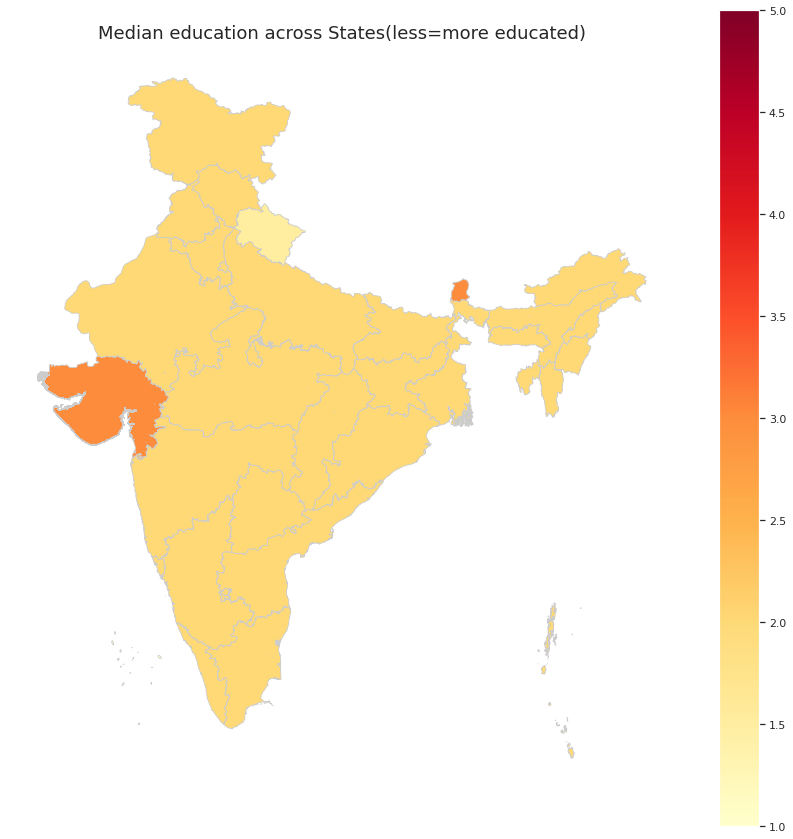

In [91]:

fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Median education across States(less=more educated)', fontsize=18)
state_wise_cases.plot(column='edu_rank', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

In [92]:
candidate_2019['edu_rank'].astype(int)
Constituency_wise_cases = pd.merge(pc_map, pd.DataFrame(candidate_2019.groupby("Constituency")["edu_rank"].median()), on="Constituency")

fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Median Education across Constituency(less=more educated)', fontsize=18)
Constituency_wise_cases.plot(column='edu_rank', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

NameError: ignored

In [93]:
rank_edu_df=pd.DataFrame(candidate_2019.groupby("edu_rank")["Winner"].mean())
rank_edu_df.reset_index(0,inplace=True)
rank_edu_df.head()

,edu_rank,Winner
0,1,0.274306
1,2,0.297297
2,3,0.269531
3,4,0.229592
4,5,0.153846


In [94]:
fig = px.bar(rank_edu_df, y='Winner', x="edu_rank",
             labels={"edu_rank": "Rank in terms of edu (lower rank = more educated)",
                     "Winner": "Unnormalized winning chances"},
             title="Chances of winning against education")
fig.show()

In [95]:
gender = candidate_2019[candidate_2019['Winner'] == 1].groupby('Gender')['Winner'].size()
total = candidate_2019.groupby('Gender')['Winner'].size()
gender_df = pd.DataFrame(data=gender)
gender_df["Total Gender Candidate"]=total
gender_df=gender_df.sort_values(by="Winner", ascending=False)[:20]
gender_df.reset_index(level=0, inplace=True)
gender_df.head(10)

,Gender,Winner,Total Gender Candidate
0,MALE,463,1760
1,FEMALE,76,258


In [96]:
d4 = gender_df.melt(id_vars="Gender", var_name="Type")
d4.head()

,Gender,Type,value
0,MALE,Winner,463
1,FEMALE,Winner,76
2,MALE,Total Gender Candidate,1760
3,FEMALE,Total Gender Candidate,258


In [97]:
fig= px.bar(d4,y=d4["value"],x=d4["Gender"], 
            color=d4["Type"],title="Gender Level Variation",barmode="group")
fig.update_layout(xaxis_categoryorder = 'total descending')
fig.show()                  

In [98]:
fig = px.pie(gender_df, values='Winner', names='Gender',
             title='Gender Wise Distribution of Winning Candidates',
             hover_name="Gender",
             hover_data=["Winner"])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [99]:
fig = px.pie(gender_df, values='Total Gender Candidate', names='Gender',
             title='Gender Wise Distribution of All Candidates',
             hover_name="Gender")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [100]:
gender = candidate_2019.loc[(candidate_2019['Gender'] =='FEMALE')&(candidate_2019['Winner'] == 1)].groupby('State')['Gender'].size()
total = candidate_2019[candidate_2019['Winner'] == 1].groupby('State')['Gender'].size()
gender_df = pd.DataFrame(data=total)
gender_df["female"]=gender
gender_df["female"]=gender_df["female"].replace(np.nan, 0)

gender_df=gender_df.sort_values(by="Gender", ascending=False)
gender_df.reset_index(level=0, inplace=True)
gender_df["female%"]=gender_df["female"]/gender_df["Gender"]
gender_df.head()


,State,Gender,female,female%
0,Uttar Pradesh,78,10.0,0.128205
1,Maharashtra,47,8.0,0.170213
2,West Bengal,42,11.0,0.261905
3,Bihar,41,3.0,0.073171
4,Tamil Nadu,38,3.0,0.078947


In [101]:
# state_map.reset_index(0,inplace=True)
# state_map.head()

In [102]:
gender_df["female%"].astype(int)
state_map.rename(columns = {'st_nm':'State'}, inplace = True)
state_wise_cases = pd.merge(state_map, gender_df, on="State")
state_wise_cases.head()

,State,geometry,Gender,female,female%
0,Andaman & Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",1,0.0,0.000000
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",2,0.0,0.000000
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",14,1.0,0.071429
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",41,3.0,0.073171
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",1,1.0,1.000000


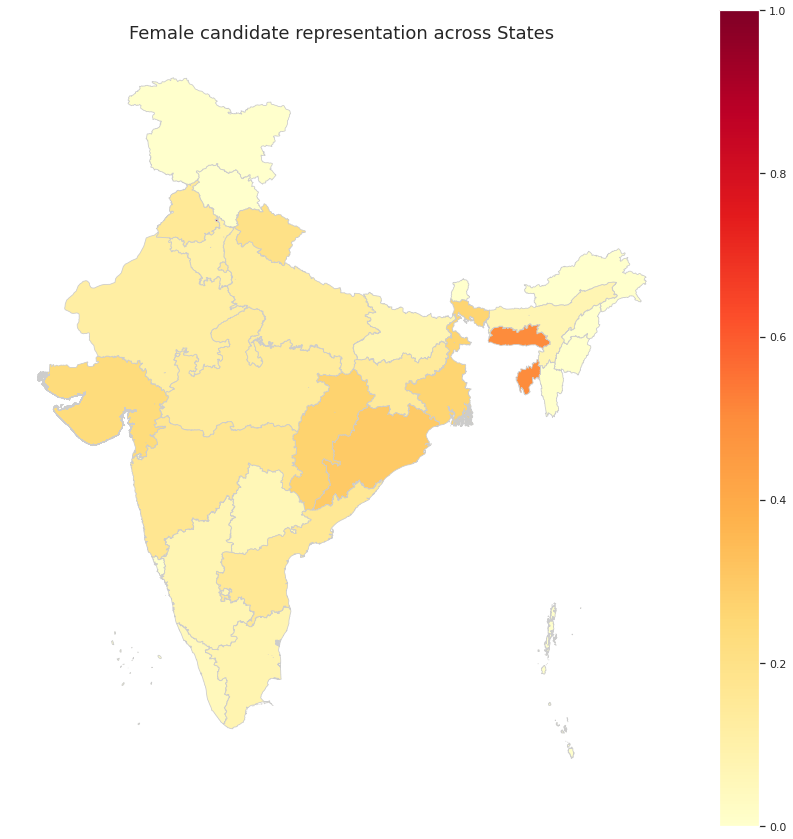

In [103]:
# state_wise_cases['female%'].fillna(0)
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Female candidate representation across States', fontsize=18)
state_wise_cases.plot(column='female%', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

In [104]:
gender = candidate_2019.loc[(candidate_2019['Gender'] =='FEMALE')&(candidate_2019['Winner'] == 1)].groupby('Constituency')['Gender'].size()
total = candidate_2019[candidate_2019['Winner'] == 1].groupby('Constituency')['Gender'].size()
gender_df = pd.DataFrame(data=total)
gender_df["female"]=gender
gender_df["female"]=gender_df["female"].replace(np.nan, 0)

gender_df=gender_df.sort_values(by="Gender", ascending=False)
gender_df.reset_index(level=0, inplace=True)
gender_df["female%"]=gender_df["female"]/gender_df["Gender"]
gender_df.head()


,Constituency,Gender,female,female%
0,AURANGABAD,3,0.0,0.0
1,HAMIRPUR,2,0.0,0.0
2,MAHARAJGANJ,2,0.0,0.0
3,NAGPUR,1,0.0,0.0
4,NAGINA,1,0.0,0.0


In [105]:
gender_df["female%"].astype(int)
# state_map.rename(columns = {'st_nm':'State'}, inplace = True)
state_wise_cases = pd.merge(pc_map, gender_df, on="Constituency")
state_wise_cases.head()

NameError: ignored

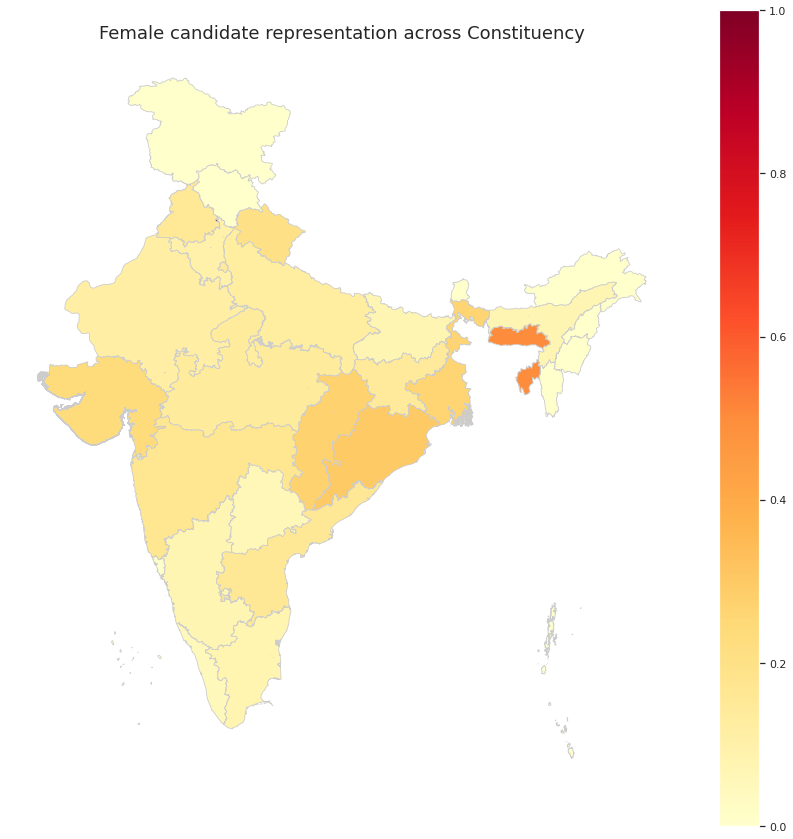

In [106]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Female candidate representation across Constituency', fontsize=18)
state_wise_cases.plot(column='female%', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

In [107]:
category = candidate_2019[candidate_2019['Winner'] == 1].groupby('Category')['Winner'].size()
total = candidate_2019.groupby('Category')['Winner'].size()
category_df = pd.DataFrame(data=category)
category_df["Total category Candidate"]=total
category_df=category_df.sort_values(by="Winner", ascending=False)[:20]
category_df.reset_index(level=0, inplace=True)
category_df.head(10)

,Category,Winner,Total category Candidate
0,GENERAL,399,1392
1,SC,85,383
2,ST,55,243


In [108]:
d5 = category_df.melt(id_vars="Category", var_name="Type")
d5.head(10)

,Category,Type,value
0,GENERAL,Winner,399
1,SC,Winner,85
2,ST,Winner,55
3,GENERAL,Total category Candidate,1392
4,SC,Total category Candidate,383
5,ST,Total category Candidate,243


In [109]:
fig= px.bar(d5,y=d5["value"],x=d5["Category"], 
            color=d5["Type"],title="Category Level Variation",barmode="group")
fig.update_layout(xaxis_categoryorder = 'total descending')
fig.show()            

In [110]:
fig = px.pie(category_df, values='Winner', names='Category',
             title='Category Wise Distribution of Winning Candidates',
             hover_name="Category",
             hover_data=["Winner"])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [111]:
fig = px.pie(category_df, values='Total category Candidate', names='Category',
             title='Category Wise Distribution of All Candidates',
             hover_name="Category")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [112]:
young_10 = cand_vote_margin.sort_values('Age',ascending=False).tail(10)
fig= px.bar(young_10,y=young_10["Name"],x=young_10["Age"], color="Party"
            ,title="Youngest Candidates")
fig.update_layout(yaxis_categoryorder = 'total descending')
fig.show()

In [113]:
old_10 = cand_vote_margin.sort_values('Age',ascending=False).head(10)
fig= px.bar(old_10,y=old_10["Name"],x=old_10["Age"], color="Party"
            ,title="Oldest Candidates")
fig.update_layout(yaxis_categoryorder = 'total descending')
fig.show()

In [114]:
age_data=candidate_2019.groupby(['Age','Gender']).count()
age_data.reset_index(level=-1, inplace=True)
age_data.reset_index(level=-1, inplace=True)
age_data.head()

,Age,Gender,State,Constituency,Name,Winner,Party,Symbol,Criminal Cases,Category,...,Liabilities,General Votes,Postal Votes,Total Votes,Over Total Electors In Constituency,Over Total Votes Polled In Constituency,Total Electors,assets_rank,cases_rank,edu_rank
0,25.0,FEMALE,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,25.0,MALE,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,26.0,FEMALE,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,26.0,MALE,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
4,27.0,FEMALE,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [115]:
fig = px.histogram(age_data, 
                   x="Age",y='Name',color='Gender')
fig.update_layout(title_text='Age Counts Distribution among the politicians on basis of Gender')
fig.show()

In [116]:
age_data=candidate_2019.groupby(['Age','Winner']).count()
age_data.reset_index(level=-1, inplace=True)
age_data.reset_index(level=-1, inplace=True)
age_data.head()

,Age,Winner,State,Constituency,Name,Party,Symbol,Gender,Criminal Cases,Category,...,Liabilities,General Votes,Postal Votes,Total Votes,Over Total Electors In Constituency,Over Total Votes Polled In Constituency,Total Electors,assets_rank,cases_rank,edu_rank
0,25.0,0,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
1,26.0,0,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2,26.0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,27.0,0,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,28.0,0,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [117]:
fig = px.histogram(age_data, 
                   x="Age",y='Name',color='Winner',
                   title='Age Counts Distribution among the politicians')
fig.update_layout(title_text='Age Counts Distribution among the winning politicians')
fig.show()

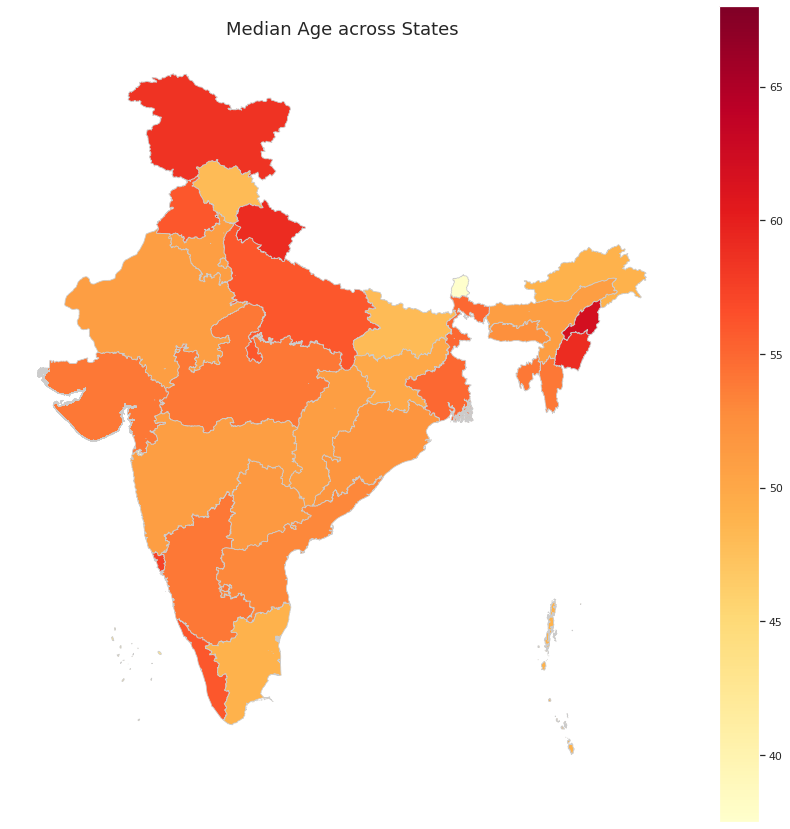

In [118]:
state_wise_cases = pd.merge(state_map, pd.DataFrame(candidate_2019.groupby("State")["Age"].median()), on="State")
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Median Age across States', fontsize=18)
state_wise_cases.plot(column='Age', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

In [119]:
state_wise_cases = pd.merge(pc_map, pd.DataFrame(candidate_2019.groupby("Constituency")["Age"].median()), on="Constituency")
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Median Age across States', fontsize=18)
state_wise_cases.plot(column='Age', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

NameError: ignored